In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from env import user, password, host
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import wrangle as w

In [2]:
df22 = pd.read_csv('DISTRICT_summary_22.csv')
df21 = pd.read_csv('DISTRICT_summary_21.csv')
df20 = pd.read_csv('DISTRICT_summary_20.csv')
df19 = pd.read_csv('DISTRICT_summary_19.csv')

In [3]:
w.prep22(df22)

In [4]:
w.prep21(df21)

In [5]:
w.prep20(df20)

In [6]:
w.prep19(df19)

In [7]:
df=w.df_combine(df19,df20,df21,df22)

In [8]:
df.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
0,CAYUGA ISD,0,603.0,82.0,14.0
1,ELKHART ISD,0,1372.0,538.0,39.0
2,FRANKSTON ISD,0,888.0,72.0,8.0
3,NECHES ISD,0,392.0,43.0,11.0
4,PALESTINE ISD,0,3640.0,1190.0,33.0


In [9]:
df.shape

(4055, 5)

In [10]:
train, validate, test= w.split_tea_data(df) 

In [11]:
train.head()

,dist_name,charter_encoded,enrollment,disciplined,discipline_percent
1598,JIM HOGG COUNTY ISD,0,1222.0,311.0,25.0
3507,EDCOUCH-ELSA ISD,0,4624.0,783.0,17.0
1195,DIMMITT ISD,0,1294.0,216.0,17.0
3820,MARFA ISD,0,293.0,52.0,18.0
1955,THE EXCEL CENTER (FOR ADULTS),1,1361.0,29.0,2.0


<AxesSubplot:xlabel='enrollment', ylabel='Count'>

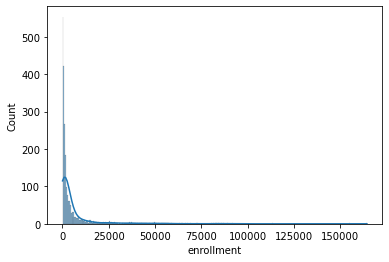

In [12]:
sns.histplot(x='enrollment', data=train, kde=True)

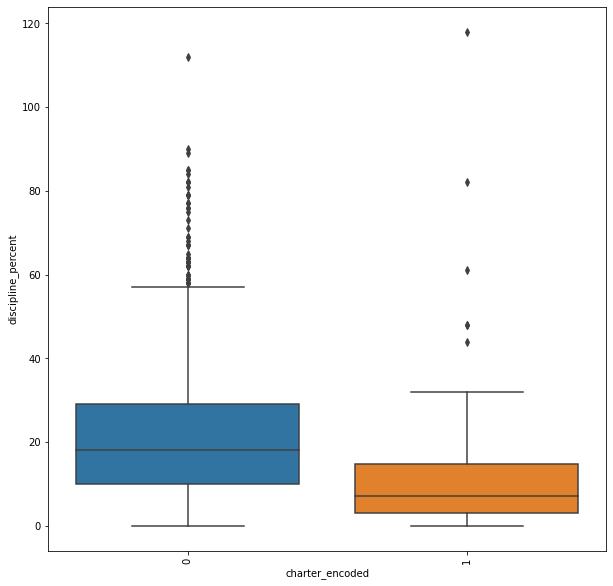

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['discipline_percent']);
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='disciplined', ylabel='Count'>

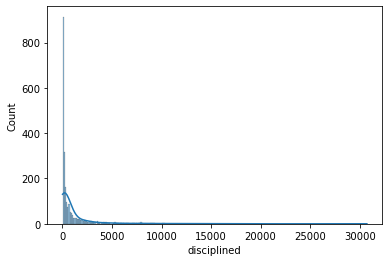

In [13]:
sns.histplot(x='disciplined', data=train, kde=True)

<AxesSubplot:xlabel='charter_encoded', ylabel='Density'>

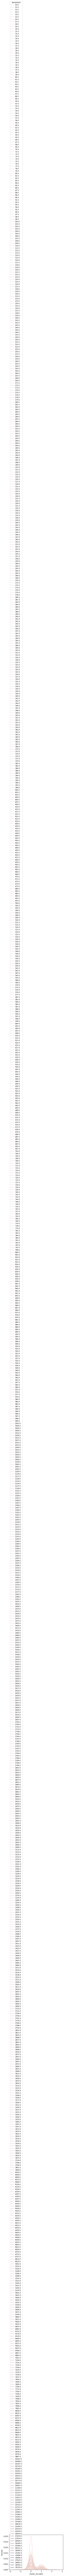

In [14]:
sns.kdeplot(x='charter_encoded', data=train, hue='disciplined')

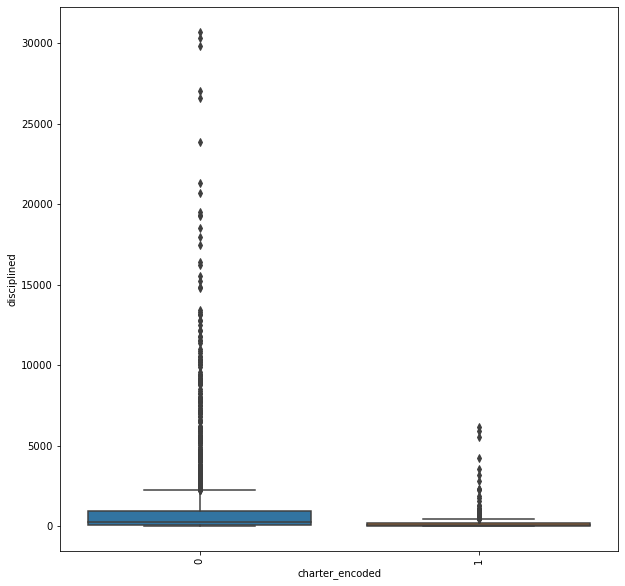

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['disciplined']);
plt.xticks(rotation = 90)
plt.show()

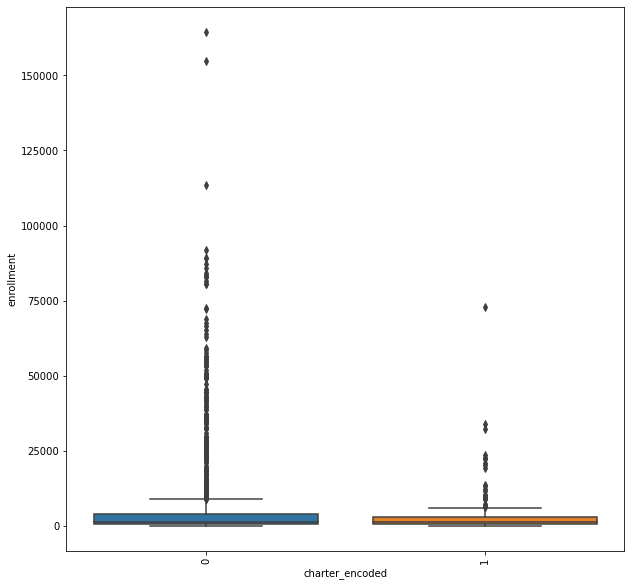

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(x=train['charter_encoded'], y=train['enrollment']);
plt.xticks(rotation = 90)
plt.show()